## Salman Sabahi
## Date Created: Nov 21, 2018

# Sleep data :

## Part 1: warm up !

### Download and import data from: 

    https://www.dropbox.com/s/mtwl4nyo3lp00gy/sleepdata.csv?dl=0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [104]:
df = pd.read_csv('./data/sleepdata.csv',sep=';')

In [105]:
df.columns

Index(['Start', 'End', 'Sleep quality', 'Time in bed', 'Wake up',
       'Sleep Notes', 'Heart rate', 'Activity (steps)'],
      dtype='object')

In [106]:
df['Sleep quality'].unique()

array(['51%', '57%', '34%', '73%', '63%', '32%', '60%', '67%', '70%',
       '44%', '46%', '40%', '48%', '69%', '41%', '28%', '42%', '43%',
       '29%', '35%', '38%', '52%', '31%', '22%', '20%', '49%', '54%',
       '65%', '58%', '56%', '53%', '68%', '88%', '76%', '78%', '55%',
       '64%', '72%', '90%', '71%', '62%', '25%', '74%', '61%', '80%',
       '66%', '85%', '45%', '33%', '79%', '77%', '36%', '83%', '47%',
       '82%', '59%', '50%', '84%', '75%', '86%', '39%', '81%', '37%',
       '89%', '87%', '24%', '95%', '91%'], dtype=object)

In [107]:
def time_con(t):
    (h, m) = t.split(':')
    result = int(h) * 60 + int(m) * 1
    return(result)

In [108]:
df['Time in bed_min'] = df.apply(lambda i: time_con(i['Time in bed']), axis=1)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

s = df['Sleep quality'].apply(lambda x: x.split('%')[0])
df['Sleep quality'] = pd.to_numeric(s)/100
# df['Start_d'] = df['Start'].str.split()[0][0]
# df['Start_t'] = df['Start'].str.split()[0][1]

# df['End_d'] = df['End'].str.split()[0][0]
# df['End_t'] = df['End'].str.split()[0][1]

In [109]:
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Time in bed_min
0,2011-06-19 08:42:08,2011-06-19 13:22:13,0.51,4:40,NaN,NaN,NaN,0,280
1,2011-06-29 07:27:53,2011-06-29 12:39:43,0.57,5:11,NaN,NaN,NaN,0,311
2,2011-06-30 08:04:06,2011-06-30 10:51:15,0.34,2:47,NaN,NaN,NaN,0,167
3,2011-07-04 05:48:35,2011-07-04 12:27:00,0.73,6:38,NaN,NaN,NaN,0,398
4,2011-07-05 05:46:29,2011-07-05 10:42:00,0.51,4:55,NaN,NaN,NaN,0,295


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 9 columns):
Start               538 non-null datetime64[ns]
End                 538 non-null datetime64[ns]
Sleep quality       538 non-null float64
Time in bed         538 non-null object
Wake up             0 non-null float64
Sleep Notes         0 non-null float64
Heart rate          5 non-null float64
Activity (steps)    538 non-null int64
Time in bed_min     538 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 37.9+ KB


In [111]:
df.dtypes

Start               datetime64[ns]
End                 datetime64[ns]
Sleep quality              float64
Time in bed                 object
Wake up                    float64
Sleep Notes                float64
Heart rate                 float64
Activity (steps)             int64
Time in bed_min              int64
dtype: object

### Bedtime Hours:

What is  most common hours? You can make a histogram of bedtime hour !


Text(0.5,0,'Starting Time')

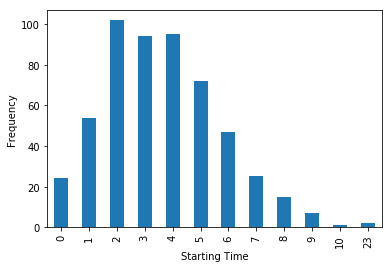

In [112]:
g = (df.groupby(df['Start'].dt.hour)['Time in bed_min'].count()).plot(kind='bar')

g.set_ylabel('Frequency')
g.set_xlabel('Starting Time')

### Conclusion ?

What does the plot show about the sleep pattern ?

Clearly, I should be sleeping earlier. According to this graph, the most common hour I fall asleep is 2 in the morning. However, I should be mindful of bias since I am less likely to initialize the Sleep Cycle app when I’m super tired - as is often the case when I fall asleep before midnight.

### Sleep Duration:

How long slept for when fell asleep. 

Can plot a histogram based on minutes of sleep

Text(0.5,0,'Time-hr')

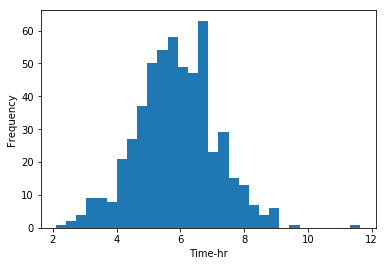

In [113]:
g = (df['Time in bed_min']/60).plot(kind = 'hist',bins=30)
g.set_xlabel('Time-hr')

### Conclusion ?

An approximately normal distribution as expected with the large sample size. On average, I slept about 355 minutes, or 5 hours and 55 minutes per night. Take note that the mean is pulled up by an outlier, the result of a 12 hour hibernation on a warm summer night last year.

### Sleep Duration Over Time:

How has the duration of sleep changed over time ?

__Note that you might want to fit a regression curve to the scatter plot you make !__

__Now modify your plot to include sleep quality as a new dimension !__

Text(0,0.5,'Hours of Sleep')

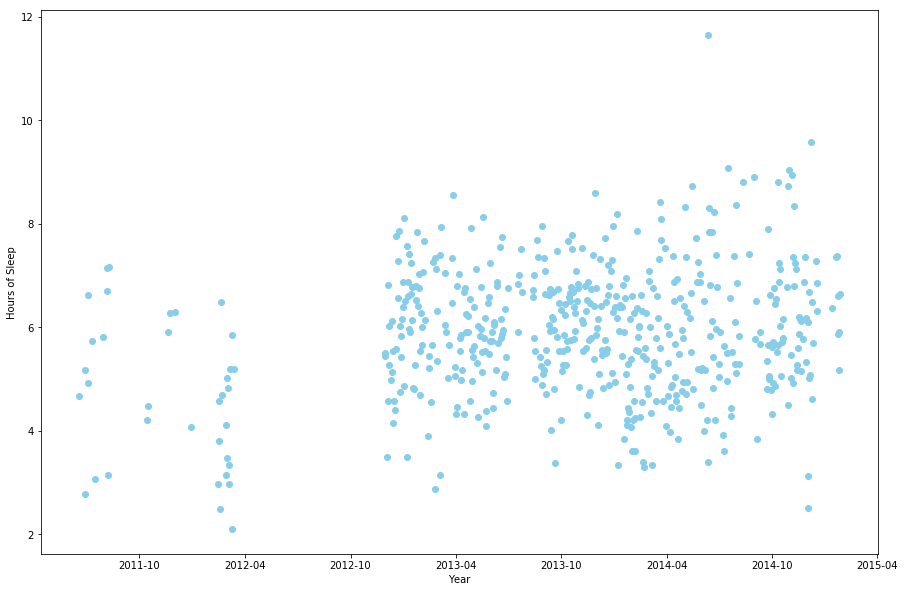

In [114]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)

x = df['Start'].dt.date
y = df['Time in bed_min']/60
ax.plot_date(x, y, xdate=True, ydate=False, color='skyblue')
ax.set_xlabel('Year')
ax.set_ylabel('Hours of Sleep')

### Conclusion ?

Can you notice any change around August 2013 ?


### Sleep Quality Over Time:

Sleep Quality is affected by two factors:

    - Total time asleep
    - Amount of movement


Since we don’t have access to the movement data, we can’t verify the relationship between movement and sleep quality. 

However, we can check the relationship between sleep duration and sleep quality. Create a visualization of that !

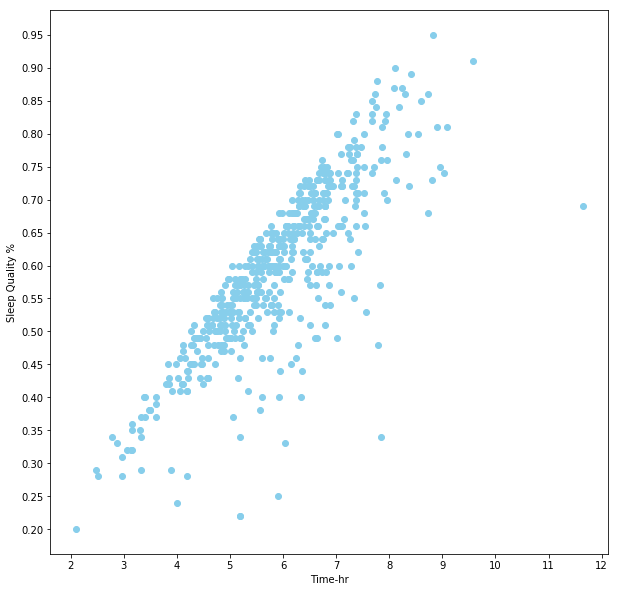

In [116]:
#import matplotlib.ticker as ticker

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

y = df['Sleep quality']
x = df['Time in bed_min']/60
ax.set_xlabel('Time-hr')
ax.set_ylabel('Sleep Quality %')


ax.set_xticks(range(0,13))

ax.set_yticks(np.linspace(0,1,21))

ax.plot_date(x, y, xdate=False, ydate=False, color='skyblue')

### Does duration mean quality ?

Given this information, it is possible for sleep quality to increase even when sleep duration decreases, especially if there is less movement in bed ! S


 plot sleep quality over time to find out if this is true !

## Part 2: A similar realistic situation:

- Lets conisder a similar where we have got sleep data from a devices. Expand on what you did above and come with extra analysis of yours. Make conclusions based on your observations

- Download the data: https://www.dropbox.com/s/7fdmc0l3410g8hu/sleep-export2.csv?dl=0

- Here are some extra info you might need:
     - http://developer.samsung.com/health/server/api/data-types/sleep
     - http://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.Sleep.html

    - https://currentmillis.com/tutorials/system-currentTimeMillis.html#utc

## Part 3 (optional ... I wouldn't do that if I were you !) : A messy realistic situation:

- Lets conisder a more realistic situation where we have got sleep data from two different devices but off the same source !

- The data is not clean. It has missing records; The format is different;

- The goal here is to develop a script that cleans up and puts the data in a format we can easily use. So, we need to make sense of the data and also clean it up for analysis...

- Download the data here : https://www.dropbox.com/s/o6mbznc047z1pxs/sleep-export.csv?dl=0

In [40]:
from datetime import datetime, timedelta

In [125]:
sleep_df = pd.read_csv('./data/sleep-export2.csv')

sleep_df['sleep_start_time'] =  pd.to_datetime(sleep_df['com.samsung.health.sleep.start_time'], unit='ms')\
               .dt.strftime('%Y-%m-%d %H:%M:%S')
sleep_df['sleep_end_time'] =  pd.to_datetime(sleep_df['com.samsung.health.sleep.end_time'], unit='ms')\
               .dt.strftime('%Y-%m-%d %H:%M:%S')
sleep_df['sleep_wakeup_time'] =  pd.to_datetime(sleep_df['original_wake_up_time'], unit='ms')\
               .dt.strftime('%Y-%m-%d %H:%M:%S')
sleep_df['sleep_update_time'] =  pd.to_datetime(sleep_df['com.samsung.health.sleep.update_time'], unit='ms')\
               .dt.strftime('%Y-%m-%d %H:%M:%S')
sleep_df['sleep_create_time'] =  pd.to_datetime(sleep_df['com.samsung.health.sleep.create_time'], unit='ms')\
               .dt.strftime('%Y-%m-%d %H:%M:%S')
    
sleep_df.head()

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency,sleep_start_time,sleep_end_time,sleep_wakeup_time,sleep_update_time,sleep_create_time
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.66304,2018-03-08 03:23:00,2018-03-08 09:30:00,2018-03-08 09:30:00,2018-03-08 13:39:58,2018-03-08 09:32:02
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,1519565416332,NaN,1519565416332,NaN,2018-02-25 06:15:00,2018-02-25 13:28:00,NaT,2018-02-25 13:30:16,2018-02-25 13:30:16
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,1527932972094,NaN,1527932972094,NaN,2018-06-02 03:37:00,2018-06-02 09:49:00,NaT,2018-06-02 09:49:32,2018-06-02 09:49:32
3,3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,NaN,NaN,1529749920000,NaN,1529735940000,UTC-0300,1529750846337,NaN,1529750846337,NaN,2018-06-23 06:39:00,2018-06-23 10:32:00,NaT,2018-06-23 10:47:26,2018-06-23 10:47:26
4,4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,NaN,NaN,1515159660000,NaN,1515128040000,UTC-0400,1515159899850,NaN,1515159899850,NaN,2018-01-05 04:54:00,2018-01-05 13:41:00,NaT,2018-01-05 13:44:59,2018-01-05 13:44:59


In [146]:
sleep_start_date = (pd.to_datetime(sleep_df['sleep_start_time'])).dt.date
sleep_create_date = (pd.to_datetime(sleep_df['sleep_create_time'])).dt.date


#range(sleep_start_date)
min(sleep_create_date)

datetime.date(2017, 12, 16)

In [147]:
max(sleep_start_date)

datetime.date(2018, 7, 29)

In [156]:
sleep_df['quality'].unique()

array([ 50003.,     nan,  50004.,  50005.,  50002.,  50001.])

In [126]:
sleep_df['sleep_wakeup_time'][0]

'2018-03-08 09:30:00'

In [127]:
sleep_df['sleep_wakeup_time'] = (pd.to_datetime(sleep_df['sleep_wakeup_time'])).dt.time

In [128]:
sleep_df['sleep_wakeup_time'][0]

datetime.time(9, 30)

In [65]:
sleep_df.columns

Index(['Unnamed: 0', 'efficiency', 'has_sleep_data',
       'com.samsung.health.sleep.datauuid', 'quality',
       'com.samsung.health.sleep.custom', 'com.samsung.health.sleep.end_time',
       'original_wake_up_time', 'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.time_offset',
       'com.samsung.health.sleep.update_time', 'original_bed_time',
       'com.samsung.health.sleep.create_time', 'original_efficiency',
       'sleep_start_time', 'sleep_end_time', 'sleep_wakeup_time',
       'sleep_update_time', 'sleep_create_time'],
      dtype='object')

In [13]:
sleep_df['com.samsung.health.sleep.time_offset'].unique()

array(['UTC-0400', 'UTC-0300', 'UTC-0700'], dtype=object)

In [31]:
sleep_df.shape

(279, 14)

In [11]:
floor_df = pd.read_csv('./data/floors_climbed.csv')
floor_df.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time
0,0,2018-01-24 21:30:56.000,com.sec.android.app.shealth,UTC-0400,2018-01-24 21:29:51.000,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720
1,1,2018-03-27 21:04:27.000,com.sec.android.app.shealth,UTC-0300,2018-03-27 21:04:01.000,1.0,00ed787d-a38b-8fcf-886d-b15a30e02ff6,2018-03-27 21:11:51.606,2018-03-27 21:11:51.606
2,2,2018-02-12 07:40:16.000,com.sec.android.app.shealth,UTC-0400,2018-02-12 07:38:21.000,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802
3,3,2018-03-16 17:17:22.000,com.sec.android.app.shealth,UTC-0300,2018-03-16 17:17:05.000,1.0,016876d6-2d1f-5514-a6c2-12b580e0654c,2018-03-16 17:22:41.066,2018-03-16 17:22:41.044
4,4,2018-01-22 15:50:38.000,com.sec.android.app.shealth,UTC-0400,2018-01-22 15:50:22.000,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367


In [148]:
floor_create_date = (pd.to_datetime(floor_df['create_time'])).dt.date

min(floor_create_date )

datetime.date(2017, 12, 16)

In [149]:
max(floor_create_date )

datetime.date(2018, 5, 3)

In [12]:
floor_df.columns

Index(['Unnamed: 0', 'end_time', 'pkg_name', 'time_offset', 'start_time',
       'floor', 'datauuid', 'update_time', 'create_time'],
      dtype='object')

In [30]:
floor_df.shape

(541, 9)

In [13]:
heartr_df = pd.read_csv('./data/heart_rate.csv')
heartr_df.head()

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,max,min,pkg_name,time_offset,datauuid,create_time
0,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,UTC-0400,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341
1,1,2017-12-16 05:50:29.380,56.0,NaN,2017-12-16 05:50:29.380,1,2017-12-16 05:55:00.264,0.0,0.0,com.sec.android.app.shealth,UTC-0400,038d68e5-ddb9-df1f-f52f-4f85c32cb95a,2017-12-16 05:55:00.264
2,2,2017-12-30 02:08:16.211,55.0,NaN,2017-12-30 02:08:16.211,1,2017-12-30 02:08:16.411,0.0,0.0,com.sec.android.app.shealth,UTC-0700,0423adf2-6d1f-6e23-276b-ec25462bf3d5,2017-12-30 02:08:16.411
3,3,2018-01-15 14:47:37.175,62.0,NaN,2018-01-15 14:47:37.175,1,2018-01-15 14:47:37.371,0.0,0.0,com.sec.android.app.shealth,UTC-0400,07dc6531-0aa6-1b07-df29-049197357434,2018-01-15 14:47:37.371
4,4,2017-12-16 02:20:29.470,47.0,NaN,2017-12-16 02:20:29.470,1,2017-12-16 02:35:00.252,0.0,0.0,com.sec.android.app.shealth,UTC-0400,0a32cb55-8257-d3ae-e87a-e38ecb14fe97,2017-12-16 02:35:00.252


In [150]:
heartr_create_date = (pd.to_datetime(heartr_df['create_time'])).dt.date
min(heartr_create_date )


datetime.date(2016, 6, 9)

In [151]:
max(heartr_create_date )

datetime.date(2018, 4, 25)

In [14]:
heartr_df.columns

Index(['Unnamed: 0', 'end_time', 'heart_rate', 'binning_data', 'start_time',
       'heart_beat_count', 'update_time', 'max', 'min', 'pkg_name',
       'time_offset', 'datauuid', 'create_time'],
      dtype='object')

In [29]:
heartr_df.shape

(311, 13)

In [15]:
sleep_df.columns

Index(['Unnamed: 0', 'efficiency', 'has_sleep_data',
       'com.samsung.health.sleep.datauuid', 'quality',
       'com.samsung.health.sleep.custom', 'com.samsung.health.sleep.end_time',
       'original_wake_up_time', 'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.time_offset',
       'com.samsung.health.sleep.update_time', 'original_bed_time',
       'com.samsung.health.sleep.create_time', 'original_efficiency'],
      dtype='object')

In [16]:
stepc_df = pd.read_csv('./data/step_count.csv')
stepc_df.head()

,Unnamed: 0,end_time,start_time,count,calorie,update_time,speed,pkg_name,time_offset,distance,datauuid,create_time
0,0,2018-04-30 18:21:59.999,2018-04-30 18:21:00.000,101,4.29,2018-04-30 18:35:00.291,1.527778,com.sec.android.app.shealth,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290
1,1,2018-04-13 19:47:59.999,2018-04-13 19:47:00.000,25,0.96,2018-04-13 19:55:00.251,1.027778,com.sec.android.app.shealth,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251
2,2,2018-04-02 10:01:59.999,2018-04-02 10:01:00.000,38,1.53,2018-04-02 10:14:58.210,1.194444,com.sec.android.app.shealth,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209
3,3,2018-04-27 10:52:59.999,2018-04-27 10:52:00.000,35,1.45,2018-04-27 10:55:01.281,1.500000,com.sec.android.app.shealth,UTC-0300,27.45,0006c29c-72a3-b207-069e-b098a9f96252,2018-04-27 10:55:01.280
4,4,2018-04-21 13:47:00.000,2018-04-21 13:46:00.000,0,0.00,2018-04-21 13:46:36.801,0.000000,com.sec.android.app.shealth,UTC-0300,0.00,001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c,2018-04-21 13:46:36.801


In [152]:
stepc_create_date = (pd.to_datetime(stepc_df['create_time'])).dt.date
min(stepc_create_date )


datetime.date(2018, 3, 31)

In [153]:
max(stepc_create_date )

datetime.date(2018, 5, 3)

In [17]:
stepc_df.columns

Index(['Unnamed: 0', 'end_time', 'start_time', 'count', 'calorie',
       'update_time', 'speed', 'pkg_name', 'time_offset', 'distance',
       'datauuid', 'create_time'],
      dtype='object')

In [28]:
stepc_df.shape

(9758, 12)

In [18]:
sleep_df.columns

Index(['Unnamed: 0', 'efficiency', 'has_sleep_data',
       'com.samsung.health.sleep.datauuid', 'quality',
       'com.samsung.health.sleep.custom', 'com.samsung.health.sleep.end_time',
       'original_wake_up_time', 'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.time_offset',
       'com.samsung.health.sleep.update_time', 'original_bed_time',
       'com.samsung.health.sleep.create_time', 'original_efficiency'],
      dtype='object')

In [19]:
excer_df = pd.read_csv('./data/exercise.csv')
excer_df.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,2018-04-07 17:40:40.673,NaN,NaN,2018-04-07 17:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
1,1,2018-01-27 10:08:00.000,NaN,NaN,2018-01-27 09:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.000,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225
2,2,2018-05-01 18:12:20.915,NaN,NaN,2018-05-01 18:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,0.0,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
3,3,2018-02-24 13:50:02.929,NaN,NaN,2018-02-24 13:35:13.243,NaN,NaN,NaN,889686,F/D7+hL5E5,...,0.0,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...,NaN,NaN,NaN,NaN,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1,2018-02-24 13:52:08.229
4,4,2018-03-16 17:25:39.584,NaN,NaN,2018-03-16 17:15:20.192,NaN,NaN,NaN,619392,F/D7+hL5E5,...,0.0,NaN,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,NaN,NaN,NaN,NaN,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581


In [143]:
excer_start_date = (pd.to_datetime(excer_df['create_time'])).dt.date

max(excer_start_date)

datetime.date(2018, 5, 3)

In [144]:
min(excer_start_date)

datetime.date(2016, 6, 25)

In [20]:
excer_df.columns

Index(['Unnamed: 0', 'end_time', 'altitude_loss', 'max_altitude', 'start_time',
       'count', 'altitude_gain', 'exercise_custom_type', 'duration',
       'deviceuuid', 'max_heart_rate', 'max_rpm', 'mean_heart_rate',
       'pkg_name', 'max_cadence', 'time_offset', 'mean_caloricburn_rate',
       'incline_distance', 'exercise_type', 'decline_distance', 'max_speed',
       'mean_power', 'max_power', 'mean_rpm', 'calorie', 'mean_cadence',
       'mean_speed', 'update_time', 'min_altitude', 'min_heart_rate',
       'count_type', 'live_data', 'max_caloricburn_rate', 'custom', 'comment',
       'additional', 'distance', 'datauuid', 'create_time'],
      dtype='object')

In [26]:
excer_df.shape

(341, 39)

In [21]:
sleep_df.columns

Index(['Unnamed: 0', 'efficiency', 'has_sleep_data',
       'com.samsung.health.sleep.datauuid', 'quality',
       'com.samsung.health.sleep.custom', 'com.samsung.health.sleep.end_time',
       'original_wake_up_time', 'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.time_offset',
       'com.samsung.health.sleep.update_time', 'original_bed_time',
       'com.samsung.health.sleep.create_time', 'original_efficiency'],
      dtype='object')

In [22]:
summary_df = pd.read_csv('./data/summary_last_session.csv')
summary_df.head()

,create_time,longest_idle_time,score,extra_data,goal,calorie,run_time,deviceuuid,update_time,longest_active_time,day_time,walk_time,pkg_name,active_time,distance,others_time,step_count,datauuid
0,2018-01-14 05:00:56.527,15780000,0,00179515-d385-4f61-81a7-2ddd68ac80b2.extra_dat...,-1,927.15780,76845,jQfnryI8/B,2018-01-15 12:48:58.842,2400000,1515888000000,8814507,com.sec.android.app.shealth,11291352,9196.5030,2400000,12889,00179515-d385-4f61-81a7-2ddd68ac80b2
1,2018-01-03 05:03:32.135,22140000,0,003f0597-41ad-4f7f-bd02-6683076a1535.extra_dat...,-1,971.60400,43840,jQfnryI8/B,2018-01-04 11:41:12.193,5363575,1514937600000,5720581,com.sec.android.app.shealth,11982148,6962.8965,6217727,13135,003f0597-41ad-4f7f-bd02-6683076a1535
2,2016-09-02 07:00:51.323,24660000,76,004dfa57-ff07-44f3-8d54-d3b9c09d41c5.extra_dat...,60,207.74994,77742,jQfnryI8/B,2016-09-03 06:20:16.720,240000,1472774400000,2726451,com.sec.android.app.shealth,2804193,3679.9102,0,4407,004dfa57-ff07-44f3-8d54-d3b9c09d41c5
3,2016-07-24 07:03:17.688,36420000,83,00d6b2b2-0211-4a80-a213-a0c2ef981715.extra_dat...,60,240.44005,55497,jQfnryI8/B,2016-07-25 05:48:14.487,540000,1469318400000,3051950,com.sec.android.app.shealth,3107447,4135.3003,0,5200,00d6b2b2-0211-4a80-a213-a0c2ef981715
4,2017-10-22 04:15:01.831,30660000,0,00d6cc12-a5c4-41c7-aa76-d81b38d49fb2.extra_dat...,-1,167.93997,6451,jQfnryI8/B,2017-10-23 01:35:00.001,600000,1508630400000,2480173,com.sec.android.app.shealth,2486624,3124.7898,0,4015,00d6cc12-a5c4-41c7-aa76-d81b38d49fb2


In [154]:
summary_create_date = (pd.to_datetime(summary_df['create_time'])).dt.date

max(summary_create_date)

datetime.date(2018, 5, 3)

In [155]:
min(summary_create_date)

datetime.date(2016, 6, 25)

In [23]:
summary_df.columns

Index(['create_time', 'longest_idle_time', 'score', 'extra_data', 'goal',
       'calorie', 'run_time', 'deviceuuid', 'update_time',
       'longest_active_time', 'day_time', 'walk_time', 'pkg_name',
       'active_time', 'distance', 'others_time', 'step_count', 'datauuid'],
      dtype='object')

In [32]:
summary_df.shape

(705, 18)

In [39]:
from datetime import datetime, timedelta

unix_ts = 1507126064
dt = (datetime.fromtimestamp(unix_ts)).strftime('%Y-%m-%d %H:%M:%S')
#dt = (datetime.fromtimestamp(unix_ts)).strftime('%H:%M:%S')


print(dt)

2017-10-04 10:07:44
